# Projection

(8.1) **Orthogonal projection: definition and uniqueness.** 
The projection of $\mathbf y$ onto $\mathsf{C}(\mathbf A)$ is the unique vector $\hat{\mathbf y}$ such that (1) $\hat{\mathbf y} \in \mathsf{C}(\mathbf A)$, and (2) $(\mathbf y - \hat{\mathbf y}) \perp \mathsf{C}(\mathbf A).$ To show uniqueness, suppose $\hat{\mathbf y}_1$ and $\hat{\mathbf y}_2$ are two orthogonal vectors to $\mathbf y.$ Then,
$$\lVert\mathbf y - \hat{\mathbf y}_2 \rVert^2 = \lVert\mathbf y - \hat{\mathbf y}_1 \rVert^2 + \lVert\hat{\mathbf y}_1 - \hat{\mathbf y}_2 \rVert^2 \geq \lVert\mathbf y - \hat{\mathbf y}_1 \rVert^2.$$

By symmetry, $\lVert\mathbf y - \hat{\mathbf y}_1 \rVert^2  = \lVert\mathbf y - \hat{\mathbf y}_2 \rVert^2.$ Thus, $\lVert\hat{\mathbf y}_2 - \hat{\mathbf y}_1 \rVert^2 = 0$ which implies $\hat{\mathbf y}_1 = \hat{\mathbf y}_2.$ Now that we have shown uniqueness, we proceed with a constructive proof of its existence.

<br>  

(8.2) **Orthogonal projection: independent columns.** Suppose $\mathbf A \in \mathbb R^{m \times n}$ has linearly independent columns and $\mathbf y$ be any vector on the output space $\mathbb R^m.$ To find the projection of $\mathbf y$ in $\mathsf{C}(\mathbf A),$ we solve for weights $\mathbf x$ such that $\mathbf A^\top( \mathbf y - \mathbf A \mathbf x ) = \mathbf 0$ getting $\mathbf x = (\mathbf A^\top \mathbf A)^{-1} \mathbf A^\top \mathbf y = \mathbf A^+ \mathbf y.$ Thus, $\hat{\mathbf y} = \mathbf A \mathbf A^+ \mathbf y$ which allows us to define the projection operator onto $\mathsf{C}(\mathbf A)$ as

$$
\begin{aligned}
P_{\mathbf A} 
= \mathbf A (\mathbf A^\top \mathbf A)^{-1} \mathbf A^\top = \mathbf A \mathbf A^+.
\end{aligned}
$$
  
<br>

(8.3) **Orthogonal projection: general case.** Does $P_{\mathbf A} = \mathbf A \mathbf A^+$ hold in the general case? Recall that the right singular vectors $\boldsymbol u_1, \ldots, \boldsymbol u_r$ form a basis for $\mathsf{C}(\mathbf A).$ It follows that we can decompose $\mathbf y$ into two components, one orthogonal and one parallel to the subspace:

$$
\mathbf y = \left(\sum_{i=1}^r \boldsymbol u_i \boldsymbol u_i^\top \mathbf y\right) + 
\left( \sum_{i=r+1}^{m} \boldsymbol u_i \boldsymbol u_i^\top \mathbf y \right).
$$

Then, the orthogonal projection of $\mathbf y$ can be constructed as $\hat{\mathbf y} = \sum_{i=1}^r \boldsymbol u_i \boldsymbol u_i^\top \mathbf y.$ This is clear from the fact that $(\mathbf y - \hat{\mathbf y}) \perp \mathsf{C}(\mathbf A)$ and $\hat{\mathbf y} \in \mathsf{C}(\mathbf A),$ and the uniqueness of such a vector. We now prove the claim that $\hat{\mathbf y} = \mathbf A \mathbf A^+ \mathbf y.$ This is actually pretty trivial:
$$
\mathbf A \mathbf A^+ = {\mathbf U \mathbf \Sigma \mathbf \Sigma}^+ \mathbf U^\top = \sum_{i=1}^r \boldsymbol u_i \boldsymbol u_i^\top.
$$

Note that unlike the previous case where the columns of $\mathbf A$ are independent, the weights that make up the projection vector is not anymore unique. Discussion of nonuniqueness of weights is continued in the next bullet.

<br>

In [4]:
import numpy as np
np.random.seed(0)

A = np.random.randn(3, 3)
y = np.array([1, 1, 2]).reshape(-1, 1)
A[:, 2] = 2 * A[:, 1]
A @ np.linalg.pinv(A) @ y

array([[1.66161314],
       [0.79740567],
       [1.24940883]])

In [5]:
A[:, [0, 1]] @ np.linalg.pinv(A[:, [0, 1]]) @ y

array([[1.66161314],
       [0.79740567],
       [1.24940883]])

(8.4) **Moore-Penrose pseudoinverse as left inverse: a wider perspective.** 
  Interestingly, the  orthogonal projection involves the Moore-Penrose pseudoinverse $\mathbf A^+$ which is a left inverse for $\mathbf A$ when the columns of $\mathbf A$ are independent. 
  This can actually be read off from $\mathbf A^+ \mathbf y = \mathbf V_r \mathbf \Sigma^+_r \mathbf U_r^\top \mathbf y.$ Note that $\mathbf U \mathbf U^\top \mathbf y = \mathbf y$ and $\mathbf U_r^\top \mathbf y$ is the components of the projection of $\mathbf y$ onto $\mathsf{C}(\mathbf A)$ with respect to the right singular vectors. Since the pseudoinverse $\mathbf \Sigma^+$ pads latter columns and rows with zero, we only get to invert that part of the vector that is in the column space of $\mathbf A,$ meanwhile the part that is normal to $\mathsf{C}(\mathbf A)$ is zeroed out. This is essentially what $\mathbf A \mathbf A^+ = \mathbf U \mathbf \Sigma \mathbf \Sigma^+ \mathbf U^\top = \sum_{i=1}^r \boldsymbol u_i \boldsymbol u_i^\top$ tells us. If $\mathbf y \in \mathsf{C}(\mathbf A)$, then $\mathbf A^+ \mathbf y$ gives a left inverse of $\mathbf y.$ The bigger picture is that the pseudoinverse gives the weights to reconstruct the projection of $\mathbf y$ which, in this case, is itself since it lies in $\mathsf{C}(\mathbf A).$ 
  
<br>

(8.5) **First Penrose equation.** 
  If $\mathbf A$ does not have independent columns, then $\mathbf A^+ \mathbf A \neq \mathbf I.$ This is a consequence of the non-uniqueness of the weights that reconstructs the projection. Suppose $\mathbf y \in \mathsf{C}(\mathbf A),$ then $\mathbf A \mathbf A^+ \mathbf A = \mathbf A$ even if $\mathbf A^+ \mathbf A \neq \mathbf I$ (from the axioms). That is, we can get $\mathbf A^+ (\mathbf A \mathbf w_1) = \mathbf w_2$ where $\mathbf w_1 \neq \mathbf w_2$ and $\mathbf A \mathbf w_1 = \mathbf A \mathbf w_2.$ This is exactly what this equation means. The second equation is the same but for right invertibility.

<br>

(8.6) **Projection matrix properties.** (1) ${P_{\mathbf A}}^2 = P_{\mathbf A}$ so it reduces to the identity when restricted to $\mathsf{C}(\mathbf A)$ and (2) ${P_{\mathbf A}}^\top = P_{\mathbf A}$ the projection matrix is orthogonal. The eigenvalues of projection matrices are either zero or one as a consequence of (1).

In the special case of projecting onto a 1-dimensional subspace of $\mathbb R^2$ spanned by the vector $\boldsymbol{a},$ we get

$$
\begin{aligned}
P_{\mathbf A} \mathbf y 
&= \boldsymbol{a} (\boldsymbol{a}^\top \boldsymbol{a})^{-1} \boldsymbol{a}^\top \mathbf y \\
&= \boldsymbol{a} \lVert \boldsymbol{a} \rVert^{-2} \lVert \boldsymbol{a} \rVert \lVert \mathbf y \rVert \cos \theta \\
&= \lVert \mathbf y \rVert \cos \theta\; \hat{\boldsymbol{a}}.
\end{aligned}
$$


<br>

(8.7) **Code demo.** We confirm computationally that $P_{\mathbf A} \mathbf y \perp (\mathbf y - P_{\mathbf A} \mathbf y)$ and plot the resulting vectors. Algebraically, this is equivalent to ${P_{\mathbf A}}^\top (\mathbf I - P_{\mathbf A}).$ 

(Ax - b) @ Ax = 9.089752139457021e-18


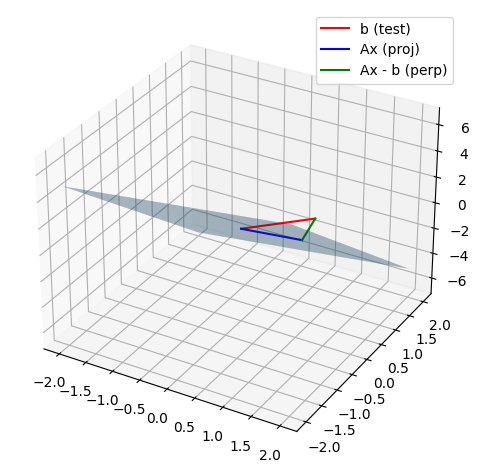

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# initialize A with C(A) plane in R^3.
np.random.seed(18)
A = np.random.randn(3, 2)
c = np.cross(A[:, 0], A[:, 1])  # normal vector to C(A)

# compute vectors
b = np.array([0.9, 0.8, 0.2])    # test vector
x = np.linalg.solve( A.T @ A, A.T @ b )
Ax = A @ x  # projection of b on C(A)

# plot surface
fig = plt.figure(figsize=plt.figaspect(1))
ax = fig.add_subplot(projection='3d')
xx, yy = np.meshgrid(np.linspace(-2, 2), np.linspace(-2, 2))
z = -( c[0] * xx + c[1] * yy ) / c[2]
ax.plot_surface(xx, yy, z, alpha=0.4)

# plot vectors
ax.plot([0,b[0]], 
        [0, b[1]], 
        [0, b[2]], 'r', label='b (test)')

ax.plot([0, Ax[0]], 
        [0, Ax[1]], 
        [0, Ax[2]], 'b', label='Ax (proj)')

ax.plot([Ax[0], b[0]], 
        [Ax[1], b[1]], 
        [Ax[2], b[2]], 'g', label='Ax - b (perp)')

print('(Ax - b) @ Ax =', (Ax - b) @ Ax )
plt.legend()
plt.tight_layout()

<br>

(8.8) **Projection matrix with orthonormal columns.** Suppose $\mathbf U$ be an $m \times n$ matrix with columns $\boldsymbol u_1, \ldots, \boldsymbol u_n$ in $\mathbb R^m$ that are orthonormal in $\mathbb R^m.$ Then, $\mathbf U^\top \mathbf U = \mathbf I_n$ so that $\mathbf U^+$ reduces to $\mathbf U^\top$. Thus

$$
\boxed{P_{\mathbf U} = \mathbf U \mathbf U^\top = \sum_{i=1}^n \boldsymbol u_j \boldsymbol u_j^\top.}
$$

This makes sense, i.e. we simply project into each unit vector. Since the vectors are orthonormal, there will be no redundancy in the projection. The job of the factor $(\mathbf A^\top \mathbf A)^{-1}$ in the general formula is to correct this redundancy.

<br>

(8.9) **Gram-Schmidt process.** Given the columns of $\mathbf A,$ we want to construct an orthonormal basis for $\mathsf{C}(\mathbf A).$ To do this, we can perform what is called the Gram-Schmidt process. Let $\boldsymbol a_1, \ldots, \boldsymbol a_n$ be the columns of $\mathbf A.$ Then an ONB $\boldsymbol u_1, \ldots, \boldsymbol u_r$ for $\mathsf{C}(\mathbf A)$ can be constructed as follows:

1. $\boldsymbol u_1 = \dfrac{\boldsymbol a_1}{\lVert \boldsymbol a_1 \rVert}.$
2. $\boldsymbol u_k =  \dfrac{{\boldsymbol a_k - \sum_{j=1}^{k-1} \boldsymbol u_{j} \boldsymbol u_{j}^\top \boldsymbol a_k}}{\lVert {\boldsymbol a_k - \sum_{j=1}^{k-1} \boldsymbol u_{j} \boldsymbol u_{j}^\top \boldsymbol a_k} \rVert} = \dfrac{\boldsymbol a_k - \mathbf U_{k-1} \mathbf U_{k-1}^\top \boldsymbol a_k}{\lVert {\boldsymbol a_k - \mathbf U_{k-1} \mathbf U_{k-1}^\top \boldsymbol a_k}\rVert}.$ 

where $\mathbf U_{k-1} = [\boldsymbol u_1 | \ldots | \boldsymbol u_{k-1}].$ That is we remove the component of $\boldsymbol a_k$ projected in the space already spanned by the earlier vectors. The resulting vector is $\boldsymbol u_k$ orthogonal to $\mathsf{C}(\mathbf U_{k-1}).$

<br>


(8.10) **Modified Gram-Schmidt.** We introduce a more numerically stable version of Gram-Schmidt which corrects intermediate errors when projecting. Observe that in the Gram-Schmidt process described above, the vector is projected in the whole space $\mathsf{C}(\mathbf U_{k-1}).$ In the modified version, at step $k$, we remove all components of later vectors that is in the span of $\boldsymbol a_k.$ 

1. Copy $\boldsymbol v_k = \boldsymbol a_k$ for $k = 1, \ldots, n.$
2. Normalize $\boldsymbol u_k = \boldsymbol v_k / \lVert \boldsymbol v_k \rVert,$ then update $\boldsymbol v_j = \boldsymbol v_j -  \boldsymbol u_k \boldsymbol u_k^\top \boldsymbol v_j$ for $j > k.$ 

The modification is that instead of projecting the column vector on the whole subspace spanned by earlier vectors, each vector is iteratively projected in the 1-dimensional subspace spanned by earlier vectors. In exact arithmetic, this algorithm returns the same set of orthonormal vectors as the classical GS (use pen and paper to calculate three vectors, i.e. proof by $n=3$). However, the modified GS is more numerically stable as we will show experimentally. Perhaps one reason is that errors are projected away in each prior iteration.

<br>

(8.11) **Code demo: stability of GS algorithms**. In the following code, we implement the two algorithms and apply it a matrix that almost has identical columns, i.e. the matrix 

$$ \mathbf A = 
\begin{bmatrix}
1 & 1 & 1 \\
\epsilon & 0 & 0 \\
0 & \epsilon & 0 \\
0 & 0 & \epsilon
\end{bmatrix}.
$$

where $\epsilon = 10^{-8}.$ We compute how close the results is to being orthonormal, i.e. calculate the L1 error $\lVert \mathbf U^\top \mathbf U - \mathbf I_m \rVert_1$:

In [16]:
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(0)

def cgs(A):
    '''Compute the classical Gram-Schmidt of the matrix A.'''
    
    U = np.zeros_like(A)
    U[:, 0] = A[:, 0] / np.linalg.norm(A[:, 0])
    for k in range(1, A.shape[1]):
        u = A[:, k] - U[:, :k] @ U[:, :k].T @ A[:, k]
        U[:, k] = u / np.linalg.norm(u)
    return U

def mgs(A):
    '''Compute the modified Gram-Schmidt of the matrix A.'''
    
    U = np.copy(A)
    for k in range(A.shape[1]):
        U[:, k] /= np.linalg.norm(U[:, k])
        for j in range(k+1, A.shape[1]):
            U[:, j] -= U[:, k] * ( U[:, k].T @ U[:, j] ) 
    return U

np.random.seed(4)
eps = lambda : 1e-8*np.random.randn()
A = np.array([
        [1,     1,      1    ],
        [eps(), 0,      0    ],
        [0,     eps(),  0    ],
        [0,     0,      eps()]
    ])
n = A.shape[1]

U = cgs(A)
print(f'L1 error (classical GS) = {np.abs((U.T @ U) - np.eye(n)).sum():.3e}')

U = mgs(A)
print(f'L1 error (modified  GS) = {np.abs((U.T @ U) - np.eye(n)).sum():.3e}')


L1 error (classical GS) = 1.020e-02
L1 error (modified  GS) = 1.525e-10


(8.12) **QR decomposition.** 
We can write $\mathbf A = \mathbf Q \mathbf R$ where $\mathbf Q$ is an $m \times m$
orthogonal matrix obtained by extending the Gram-Schmidt basis to an ONB of $\mathbb R^m,$ and 
$\mathbf R = \mathbf Q^\top \mathbf A.$ 
Note that the entries of $\mathbf R$ are $r_{ij} = \boldsymbol q_i^\top \boldsymbol a_j.$ But $\boldsymbol q_j = \gamma (\boldsymbol a_j - \mathbf {Q}_{j-1} \mathbf Q_{j-1}^\top \boldsymbol a_j)$ for some scalar $\gamma.$ Thus,

$$
\gamma^{-1}\boldsymbol q_j + \mathbf {Q}_{j-1} \mathbf Q_{j-1}^\top \boldsymbol a_j=  \boldsymbol a_j.
$$

This means $\boldsymbol a_j \in \mathsf{C}(\mathbf Q_{j}).$ But for $i > j$, by construction, $\boldsymbol q_i \perp \mathsf{C}(\mathbf Q_j)$ which implies $r_{ij} = {\boldsymbol q_i}^\top \boldsymbol a_j = 0.$ The idea is that later Gram-Schmidt vectors are orthogonal to earlier column vectors &mdash; which are spanned by earlier GS vectors. It follows that $\mathbf R$ is upper triangular. 

<br>

(8.13) **Computing the Gram-Schmidt in Numpy.** To perfom the Gram-Schmidt algorithm on the columns of a matrix `A` in numpy, simply call `Q, R = np.linalg.qr(A)` to get the orthogonal matrix `Q` having the same colum span as `A`. 


In [17]:
A = np.random.randn(20, 20)
Q, R = np.linalg.qr(A)
np.abs(Q @ Q.T - np.eye(20)).mean()

9.439552318720857e-17

In [18]:
np.abs(Q.T @ Q - np.eye(20)).mean()

8.744975308747056e-17

<br>

(8.14) **Inverse from QR.** The QR decomposition allows for easy computation of the inverse: 
  $$
  \boxed{\phantom{\Big]}\mathbf A^{-1} = \mathbf R^{-1} \mathbf Q^\top.\phantom{\Big]}}
  $$ 

  The inverse of $\mathbf R$ is faster to compute since it is upper triangular. An experiment for this is done in the following cell:
<br>

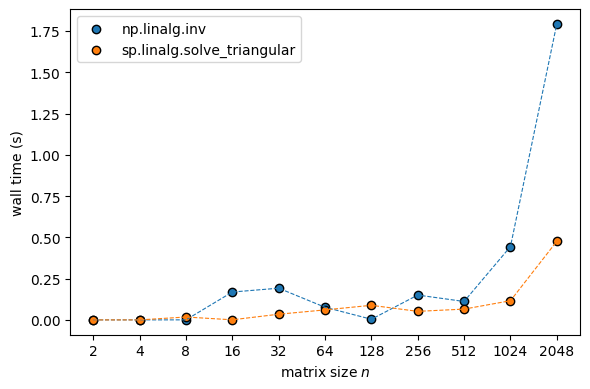

In [24]:
from scipy.linalg import solve_triangular
import numpy as np 
import time
import matplotlib.pyplot as plt
np.random.seed(0)


inv_times = []
tri_times = []
pow_range = range(1, 12)
for j in pow_range:
    n = 2**j
    A = np.random.randn(n, n)
    
    # square matrix
    start_time = time.process_time()
    np.linalg.inv(A)
    inv_times.append(time.process_time() - start_time)

    # triangular
    A = np.triu(A)
    start_time = time.process_time()
    solve_triangular(A, np.eye(n), lower=False)
    tri_times.append(time.process_time() - start_time)


# plot
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

plt.scatter(pow_range, inv_times, marker='o', edgecolors='k', label='np.linalg.inv')
plt.scatter(pow_range, tri_times, marker='o', edgecolors='k', label='sp.linalg.solve_triangular')
ax.plot(pow_range, inv_times, linestyle='--', linewidth=0.8)
ax.plot(pow_range, tri_times, linestyle='--', linewidth=0.8)

ax.set_xticks(pow_range)
ax.set_xticklabels([2**j for j in pow_range])
ax.set_ylabel('wall time (s)')
ax.set_xlabel(f'matrix size $n$')
fig.tight_layout()
plt.legend();

**Figure.** Wall time for computing the inverse of a full (blue) and upper triangular (orange) randomly generated n-by-n matrix. 

<br>

* (8.15) **Sherman-Morrison inverse.** From [(24)](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf), $\det( \mathbf I + \boldsymbol u \boldsymbol v^\top) = 1 + \boldsymbol v^\top \boldsymbol u.$ Thus, the identity perturbed by a rank $1$ matrix is invertible if and only if $1 + \boldsymbol v^\top \boldsymbol u \neq 0.$ In this case the we have a formula for the inverse:
  $$
  \boxed{\left(\mathbf I + \boldsymbol u \boldsymbol v^\top\right)^{-1} = \mathbf I - \dfrac{\boldsymbol u \boldsymbol v^\top}{1 + \boldsymbol v^\top \boldsymbol u}.}
  $$
  
<br>